<a href="https://colab.research.google.com/github/Debugger-Dev/Assignments-Python/blob/main/LinearReg_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
root="/content/drive/MyDrive/Datasets and models/Regression Models"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir(root)

In [ ]:
!ls

'Linear regression_OLS'      'Outliers and Feature Engineering'
 LinearReg_SKLEARN.ipynb     'Polynomial Regression.ipynb'
'Logistic Regression_Heart'   Regularization
'Logistics Regression'


In [ ]:
assert root==os.getcwd()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets and models/Datasets/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
x=df.drop(["Sales"], axis=1)
y=df["Sales"]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=101)

In [ ]:
len(X_train)

154

In [ ]:
len(X_test)

46

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred_test = model.predict(X_test)
pred_test

array([13.89416546, 21.50882623, 12.53809184, 15.66482792,  8.82857759,
        7.20601056, 22.11328103, 18.92082016, 12.39451631, 20.23269808,
       10.89091697, 15.83415575, 17.1134602 , 20.78002671, 18.95624833,
        9.67857104, 19.36845348,  9.86480039,  8.42916054, 21.14320473,
        7.66720198, 18.20830736, 25.07007914, 23.5196512 ,  9.24674935,
       15.81008512, 23.71972229,  8.98756009, 14.67449046, 10.30312874,
        9.49679248, 20.22117631, 12.38761271,  6.83076476, 17.83847212,
        9.94233388, 10.51098911, 10.16188417,  9.03604768, 13.37629114,
       12.06778325, 12.35890257, 11.32763266,  7.77231136, 11.53545185,
       10.46388865])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

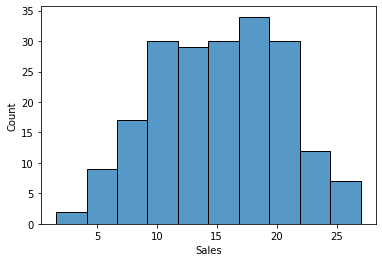

In [ ]:
sns.histplot(data=df,x="Sales")

In [ ]:
mean_absolute_error(y_test,pred_test)

1.3055198025446761

In [ ]:
MSE =mean_squared_error(y_test,pred_test)
MSE

2.65108849626004

In [ ]:
import math
RMSE=math.sqrt(MSE)
RMSE

1.6282163542539547

In [ ]:

#RESIDUAL PLOT ->to check whether the linear regression model is applicable for our dataset or not

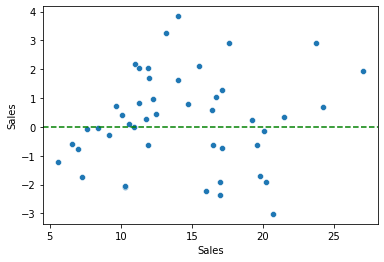

In [ ]:
#1.Residual plot
test_residuals=y_test-pred_test
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color="green",ls="--")
#follows a random pattern,so linear regression is valid for the dataset

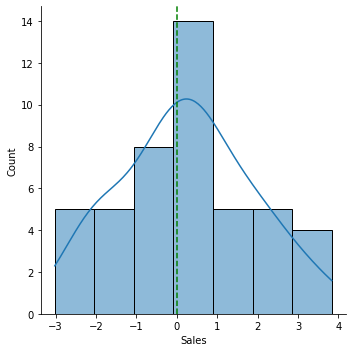

In [ ]:
#2.Probability dist fun
#follows a ND means follows Linear regression
sns.displot(test_residuals,kde=True)
plt.axvline(x=0,color="green",ls="--")

Text(0.5, 1.0, 'Newspaper Spend')

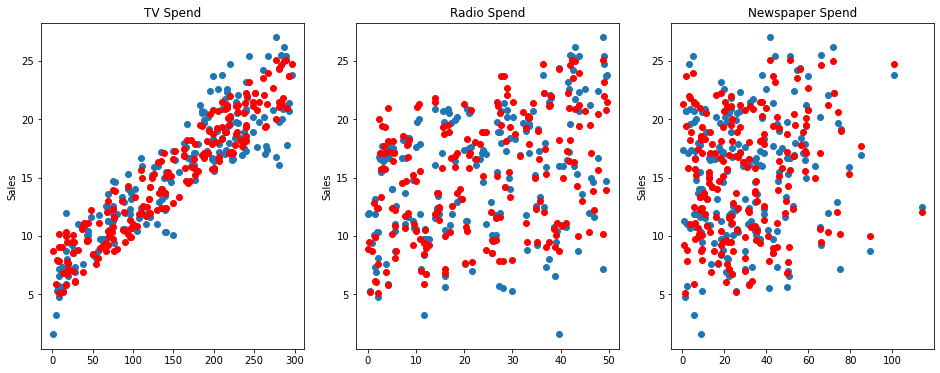

In [ ]:
y_hat=model.predict(x)

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')  #Actual values
axes[0].plot(df['TV'], y_hat, 'o', color='red')  #predicted values
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red') 
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")